In [1]:
# Importing libraries and helpers
import numpy as np
import random 
from collections import Counter
from matplotlib import pyplot as plt
import math
from helpers import *

In [2]:
# Number of nodes in graph
N = 15

In [3]:
# Plot the graph used in analysis
def plot_graph(u,v,adj):
    
    # Create Graph
    n = len(adj)
    edges = []
    for u1 in range(n):
        for v1 in adj[u1]:
            if u1<v1:
                edges.append([u1,v1])   
    g = ig.Graph(n=n, edges=edges)
    
    # Formatting
    g.vs["label"] = [str(i) for i in range(n)]
    g.vs["color"] = ["yellow"] * n
    g.vs[u]["color"] = "red"
    g.vs[u]["label"] = "u"
    g.vs[v]["color"] = "green"
    g.vs[v]["label"] = "v"
    
    # Display
    layout = g.layout("kk")
    fig, ax = plt.subplots()
    ig.plot(g, layout=layout, target=ax)
    plt.show()    

In [4]:
# To perform one run of the experiments
def hitting_time_exp(u,v,adj):
    time_taken = 0
    current = u
    while current!=v:
        current = take_step(current, adj)
        time_taken+=1
    return time_taken

def commute_time_exp(u,v,adj):
    return hitting_time_exp(u,v,adj) + hitting_time_exp(v,u,adj)

Retrying v selection since u=v


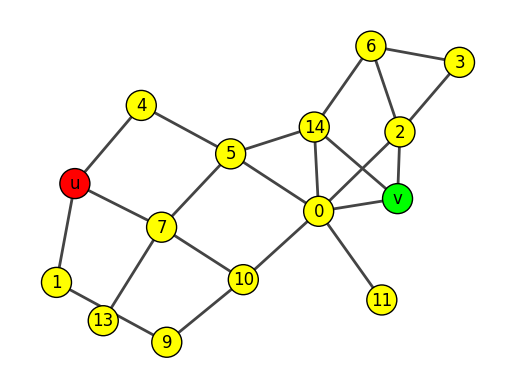

In [5]:
# Create Random Graph
adj = generate_graph(N)
while is_connected(adj)==False:
    adj = generate_graph(N)
    print("Retrying Graph Generation since not connected")

# Select random u,v
u = random.choice([i for i in range(N)])
v = random.choice([i for i in range(N)])
while u==v:
    v = random.choice([i for i in range(N)])
    print("Retrying v selection since u=v")

# Display graph
plot_graph(u,v,adj)

In [6]:
# Perform experiments and collect data
measured_commute_times = []
for exp in range(1000000):
    measured_commute_times.append(commute_time_exp(u,v,adj))

data = list(Counter(measured_commute_times).items())
data.sort()

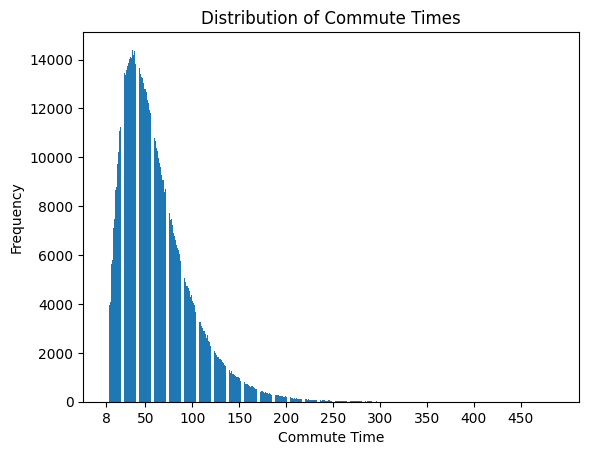

In [7]:
# Plot the data
steps, freqs = zip(*data)
xticks = [data[0][0]]
val = 50
while val <= data[-1][0]:
    xticks.append(val)
    val+=50
plt.xticks(xticks)
plt.bar(steps, freqs)
plt.xlabel("Commute Time")
plt.ylabel("Frequency")
plt.title("Distribution of Commute Times")
plt.show()

In [8]:
# Compute the number of surviving walkers at a given time
cumulative_data = []
for i in range(len(data)):
    step = data[i][0]
    tot_freq = data[i][1]
    for j in range(i,len(data)):
        tot_freq+=data[j][1]
    cumulative_data.append((step,tot_freq))

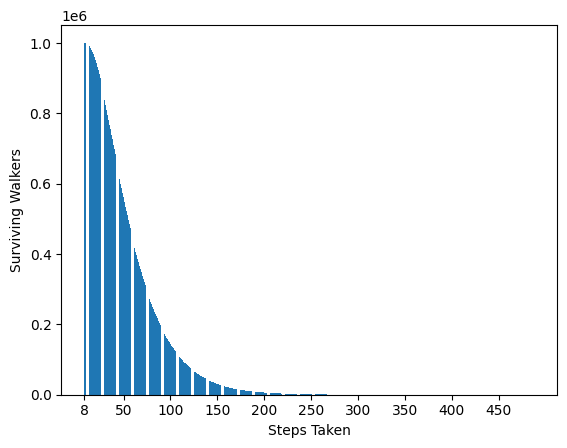

In [9]:
# Plot number of surviving walkers
steps, tot_freqs = zip(*cumulative_data)
xticks = [data[0][0]]
val = 50
while val <= data[-1][0]:
    xticks.append(val)
    val+=50
plt.xticks(xticks)
plt.bar(steps, tot_freqs)
plt.xlabel("Steps Taken")
plt.ylabel("Surviving Walkers")
plt.show("Surviving walkers at a given time")

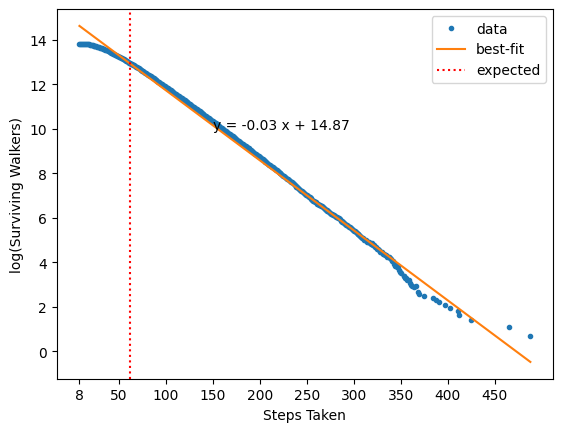

In [10]:
# Take logarithm
log_cumulative_data = []
for i in range(len(data)):
    step = data[i][0]
    tot_freq = data[i][1]
    for j in range(i,len(data)):
        tot_freq+=data[j][1]
    log_cumulative_data.append((step,math.log(tot_freq)))

# Plot the data
xticks = [data[0][0]]
val = 50
while val <= data[-1][0]:
    xticks.append(val)
    val+=50
plt.xticks(xticks)
plt.xlabel("Steps Taken")
plt.ylabel("log(Surviving Walkers)")
steps, log_tot_freqs = zip(*log_cumulative_data)
plt.plot(steps, log_tot_freqs, ".",label="data")

# Line-Fitting
slope,c = np.polyfit(steps,log_tot_freqs,1)
y = [slope*x+c for x in steps]
plt.plot(steps,y,label="best-fit")
x_coord = 150
y_coord = 10
plt.text(x_coord, y_coord, "y = "+str(round(slope,2))+" x + "+str(round(c,2)), fontsize=10, color='black') 

# Expected Value
plt.axvline(x=sum(measured_commute_times)/len(measured_commute_times),label="expected",color="red",linestyle="dotted")
plt.legend()
plt.show()

In [11]:
# Compare empirical and actual
E_emp =  sum(measured_commute_times)/len(measured_commute_times)
print("Empirical expected =",E_emp)

m = sum([len(nbr) for nbr in adj.values()]) / 2
print("Calculated expected =", 2 * m * Ruv(u,v,adj))

Empirical expected = 61.641464
Calculated expected = 61.70109512561735


In [12]:
# Line-Fitting interpretation
print("Walks taking more than t steps the E[Cuv] ~ ",int(math.exp(c)),"* exp( - t / ", ( -1 / slope),")")

Walks taking more than t steps the E[Cuv] ~  2862898 * exp( - t /  31.79379106935669 )
